<a href="https://colab.research.google.com/github/Strix9289/Introduction-of-Deep-Learning/blob/master/Activation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 活性化関数

**勾配消失問題**：ニューラルネットワークは**誤差逆電波法**によって、勾配が計算されている

つまり、**(ある相の勾配) = (1層前の勾配) x (2層前の勾配) x ... x (出力層の勾配)**と積の形で求めるため、

途中のから勾配の大きさが小さくなると入力層付近の勾配はどんどん0に近づく。

- Tanhの場合、入力値が0から離れると勾配が0に近くなるため、層が深くなると最適化が進みづらい
- ReLUの場合、常に勾配が1。前の層に勾配が伝わりやすく演算もシンプルで端末実装も容易。
- LeakyReLU: 0よりも小さな値にも勾配があり、勾配もパラメタとして学習できるPReLUもある。実装が重い
- ELU: 0よりも小さな値にも滑らかに変化する勾配がある。Softplus、SELUもこれに近い関数。実装が重い
‐ CReLU: CNNのフィルタには単純に符合を反転させたもののペアが存在する場合がある。これをCReLUを実装することで符号反転バージョンを作り、パラメタ数を減らすことができる。
- Swish: 強化学習を用いて発見された活性化関数。


In [50]:
#ライブラリ
%matplotlib inline
import numpy as np
import math 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [51]:
#固定変数の定義
e = math.e
pi = math.pi

## 活性化関数が必要な理由


### そもそも深層学習の目的は...

そもそも、深層学習の目標は表現力の高い関数を作り出すことでした。

もう少し具体的言えば**少ないパラメタで複雑な関数を作り出すこと**です。

しかし、例えば1024次関数を作ろうと思ったら1025個のパラメタが必要になります。

$$f(x)=ax^{1024}+bx^{1023}+cx^{1022}+.........+\varsigma x+\varphi$$

しかし、2次関数を10回重ねることで、同様の1024次関数を作ることができます。
$$f(x)=f(...(f(f(ax^2+bx+c))...)$$

後者の場合、$3\times10 = 30$で済みます。

しかし、1次関数の場合何回重ねても1次関数なので表現力を高めることができません。

In [77]:
#二次関数を定義
def f(x):
  a = 2
  b = 3
  c = 4
  return a*x**2+b*x+c

#一次関数の定義
def g(x):
  a = 3
  b = 4
  return a*x+b

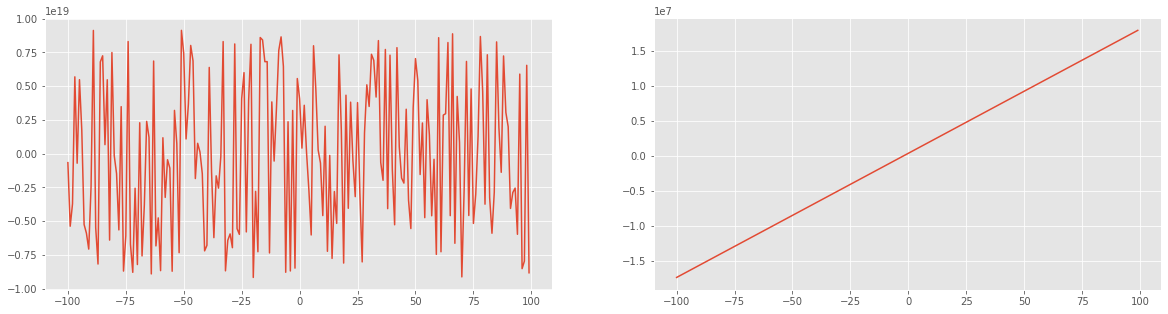

In [86]:
#@title 関数を重ねる回数をいじってみてください { form-width: "500px" }
loop_times = 10 #@param {type:"slider", min:1, max:20, step:1}

fig = plt.figure(figsize=(20, 5))
x = np.arange(-100,100,1)
#ループを増やして重ねる回数を増やすことで表現できる部分が増えていくのが分かります。
for i in range(loop_times):
  if i == 0:
    y = f(x)
    z = g(x)
  else:
    y = f(y)
    z = g(z)

#左に二次関数、右に一次関数を表示します。
ax_1 = fig.add_subplot(121)
ax_2 = fig.add_subplot(122)
ax_1 = ax_1.plot(x,y)
ax_2 = ax_2.plot(x,z)
plt.show()

### 非線形関数

さて、話がそれましたが、2次関数を重ねることで圧倒的にパラメタ数を削減できましたが、まだ問題があります。

それは、2次関数であっても入力変数を$n$とすると必要なパラメタの数は約$\frac{n^2}{2}$になることです。なぜなら、$n$変数の$d$次斉次多項式の次元は$\begin{eqnarray*}&& {}_{d+n-1} C _d\end{eqnarray*}$となるためです。詳しくはこちら(https://ja.wikipedia.org/wiki/%E6%96%89%E6%AC%A1%E5%A4%9A%E9%A0%85%E5%BC%8F)

つまり、フルHD画像の場合$450$億なので2次関数もきつい...

そこで必要になるのが、一次関数みたいにシンプルで2次関数みたいな複雑な表現ができるものとして、**非線形関数**が登場します。これによって、入力次元$n$に対して$n+1$のパラメタで対応できるようになります!

それでは、代表的な活性化関数であるReLUを使ってみましょう！！

二次関数ほどではありませんが確かにいろいろな値が取れるようになることが確認できると思ます。

In [161]:
#@title 活性化関数の中のパラメタを変更してみてください { form-width: "600px" }
a = 7.4 #@param {type:"slider", min:-10, max:10, step:0.1}
b = 9.2 #@param {type:"slider", min:-10, max:10, step:0.1}
def r(x):
  z = a*x+b
  return x*(z>0)

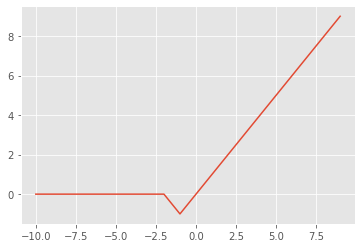

In [162]:
x = np.arange(-10,10,1)
for i in range(10):
  if i == 0:
    z = r(x)
  else:
    z = r(z)
plt.plot(x,z)
plt.show()

## 活性化関数：Activate
* sigmoid: $f(x)=\dfrac{1}{1+e^{-x}}$
* ReLU: $f(x)=\max(0,x)$
* tanh: $f(x)=\tanh(x)=\dfrac{e^x-e^{-x}}{e^x+e^{-x}}$
* softmax: $f(x)=\dfrac{\exp(x_d)}{\sum_{d'} \exp(x_{d'})} \quad (x\in\mathbb{R}^D,\ d=1,2,\ldots,D)$ 予想確立を出す

# シグモイド関数

In [33]:
def sigmoid(x):
  return  1/(1+e**-x)

<function matplotlib.pyplot.show>

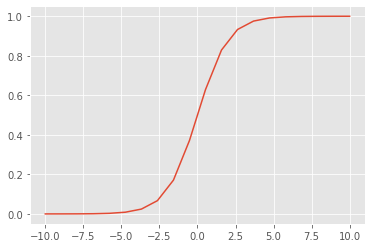

In [34]:
#np.linespace(左端、右端、何等分するか)
x = np.linspace(-10,10,20)
y = sigmoid(x)
plt.plot(x,y)
plt.show

# ReLU

深層学習の発展に最も寄与した関数ともいわれています。
また、後述の**勾配消失**が起こりにくい関数でもあります。

In [26]:
def ReLU(x):
  return x * (x > 0)

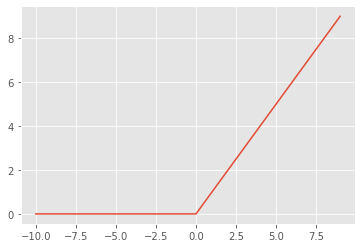

In [27]:
#np.arange(左端、右端、どのくらいで刻むか)
x = np.arange(-10,10,1)
y = ReLU(x)
plt.plot(x,y)
plt.show()

# Tanh

In [31]:
def tanh(x):
    return np.tanh(x);

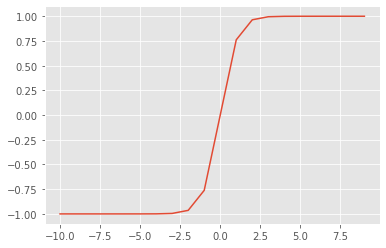

In [32]:
x = np.arange(-10,10,1)
y = tanh(x)
plt.plot(x,y)
plt.show()

# Softmax

入力値を$x_i$とすると大小関係をそのまま$$0<y_i<1$$$$y_1+y_2+...+y_n=1$$

となるため、どのような値を入力しても確率分布を満たしてくれるようになります。

そのため、機械学習の分類問題の最後の活性化関数として利用されることが多いです。

In [37]:
# ソフトマックス関数を定義
def softmax(x):
    u = np.sum(np.exp(x))
    return np.exp(x)/u

In [41]:
x = np.array([1,2,3])
y = softmax(x)

#以下見やすいように整形
df = pd.DataFrame()
df["x"] = x
df["y"] = y
df

,x,y
0,1,0.090031
1,2,0.244728
2,3,0.665241


# ELU